In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load Model
model = keras.models.load_model('3(best).keras')

In [3]:
# load training data
x_df = pd.read_csv('x_df.csv')
x_df = x_df.iloc[:, 1:]


In [4]:
shap.initjs()

In [5]:
X_train, X_test = train_test_split(x_df, test_size = 0.3, random_state=42)

In [6]:
explainer = shap.KernelExplainer(model, X_train.iloc[:, :])

Using 249 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [7]:
shap_values = explainer.shap_values(X_train.iloc[:, :], nsamples = 500)

  0%|          | 0/249 [00:00<?, ?it/s]

In [8]:
mean_list = [np.mean(shap_values[:, i]) for i in range(shap_values.shape[1])]

len(mean_list)

736

In [9]:
shap_df = pd.DataFrame(mean_list, X_train.columns.tolist())
shap_df = shap_df.T

<BarContainer object of 736 artists>

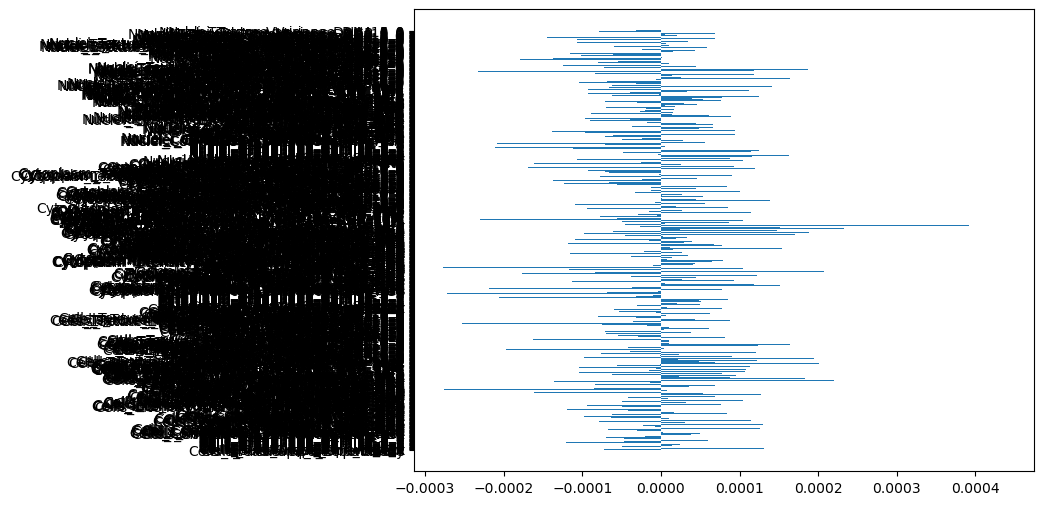

In [10]:
plt.figure(figsize = (8,6))
plt.barh(shap_df.columns, shap_df.iloc[0, :])

In [15]:
high_feat = shap_df.iloc[0, :].sort_values(ascending = False).head(10)
low_feat = shap_df.iloc[0, :].sort_values(ascending = True).head(10)

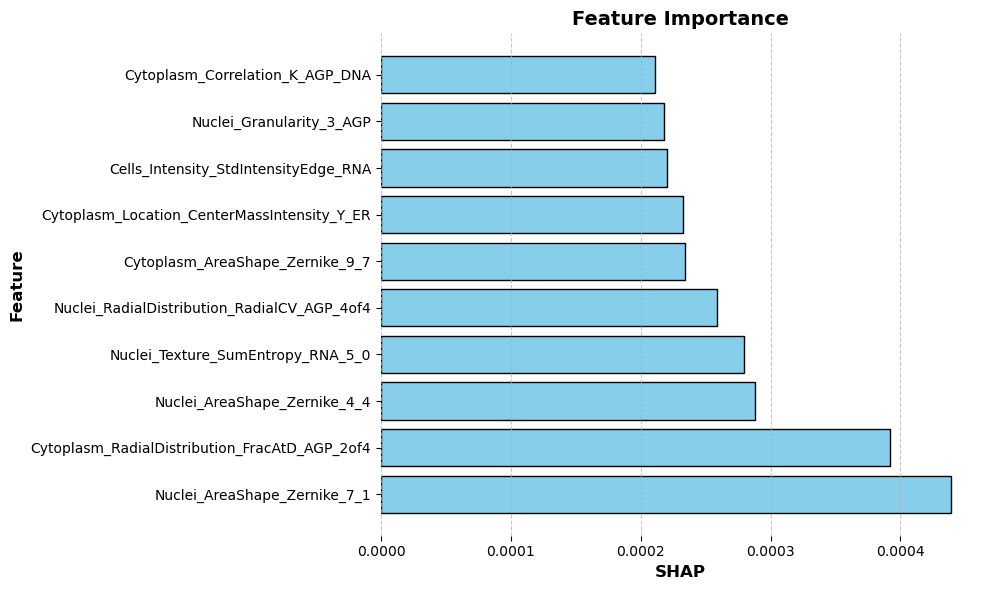

In [17]:
plt.figure(figsize=(10, 6))

# Horizontal bar plot
plt.barh(high_feat.index, high_feat, color='skyblue', edgecolor='black')

# Style adjustments
plt.xlabel('SHAP', fontsize=12, weight='bold')
plt.ylabel('Feature', fontsize=12, weight='bold')
plt.title('Feature Importance', fontsize=14, weight='bold')

# Remove spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ensure tight layout
plt.tight_layout()

# Show plot
plt.savefig('high_feat.png', dpi = 300)
plt.show()

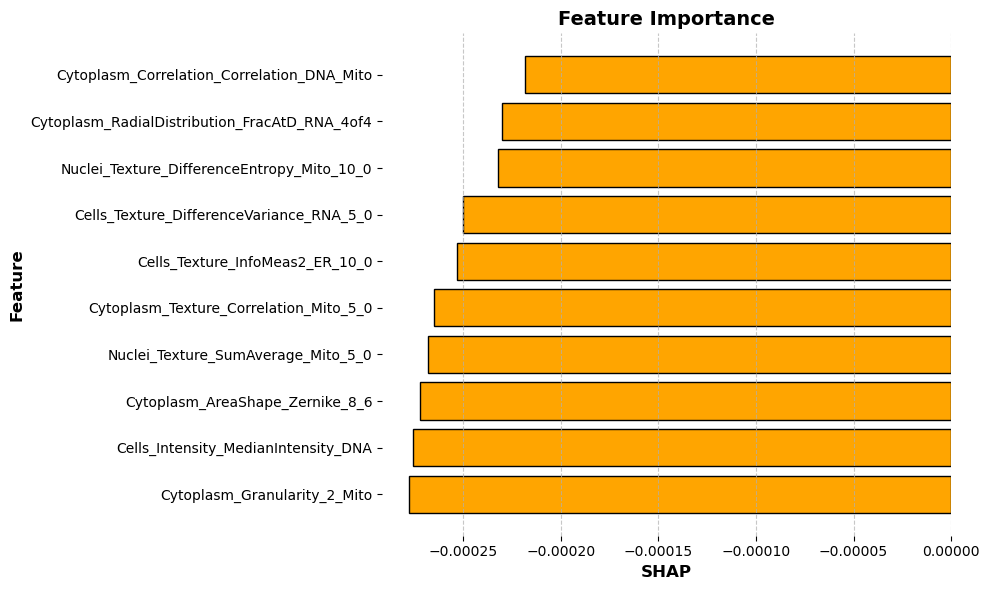

In [18]:
plt.figure(figsize=(10, 6))

# Horizontal bar plot
plt.barh(low_feat.index, low_feat, color='#FFA500', edgecolor='black')

# Style adjustments
plt.xlabel('SHAP', fontsize=12, weight='bold')
plt.ylabel('Feature', fontsize=12, weight='bold')
plt.title('Feature Importance', fontsize=14, weight='bold')

# Remove spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ensure tight layout
plt.tight_layout()

# Show plot
plt.savefig('low_feat.png', dpi = 300)
plt.show()